In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
dtrain = pd.read_csv('data/cleaned_train.csv')
dtest = pd.read_csv('data/cleaned_test.csv')

## Tuning Response variable with 99 percentile

This is to get a slightly improved RMSE

In [3]:
mask = dtrain.Purchase > np.percentile(dtrain.Purchase, 99)
dtrain.loc[mask, 'Purchase'] = np.percentile(dtrain.Purchase, 99)

## Feature Enigneering (product_id)

Creating features like

- total_purchases - Total purchase amount for each product_id
- mean_purchases - Mean purchase amount for each product_id
- count_purchases - Number of purchases of each product_id

In [13]:
total_purchases = dtrain.groupby('Product_ID')['Purchase'].sum()
mean_purchases = dtrain.groupby('Product_ID')['Purchase'].mean()
count_purchases = dtrain.groupby('Product_ID')['Purchase'].count()

In [14]:
def get_total_purchases(pid):
    try:
        return total_purchases[pid]
    except KeyError:
        return 0

def get_mean_purchases(pid):
    try:
        return mean_purchases[pid]
    except KeyError:
        return 0

def get_count_purchases(pid):
    try:
        return count_purchases[pid]
    except KeyError:
        return 0


In [15]:
dtrain['total_purchases_productID'] = dtrain.Product_ID.apply(lambda pid: get_total_purchases(pid))
dtrain['mean_purchases_productID'] = dtrain.Product_ID.apply(lambda pid: get_mean_purchases(pid))
dtrain['count_purchases_productID'] = dtrain.Product_ID.apply(lambda pid: get_count_purchases(pid))

dtest['total_purchases_productID'] = dtest.Product_ID.apply(lambda pid: get_total_purchases(pid))
dtest['mean_purchases_productID'] = dtest.Product_ID.apply(lambda pid: get_mean_purchases(pid))
dtest['count_purchases_productID'] = dtest.Product_ID.apply(lambda pid: get_count_purchases(pid))

## Feature Selection

In [20]:
import operator
def xgb_feature_importance(features, labels, num_rounds, verbose=False, fnames="*"):
    if fnames == "*":
        pass
    else:
        # // TODO Implement feature selection later
        pass
    
    param = {}
    param['objective'] = 'reg:linear'
    param['eta'] = 0.01
    param['max_depth'] = 8
    param['seed'] = 42
    param['nthread'] = -1
    param['eval_metric'] = "rmse"
    param['silent'] = 1
    dtrain = xgb.DMatrix(features, label=labels)
    if verbose:
        watchlist = [(dtrain, 'train')]
        gbdt = xgb.train(param, dtrain, num_rounds, watchlist)
    else:
        gbdt = xgb.train(param, dtrain, num_rounds)
    importance = gbdt.get_fscore()
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
    df = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    plt.figure()
    df.plot()
    df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')
    plt.show()

#### Set 1

In [21]:
cols1 = [
    'User_ID',
    'Gender',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'mean_age',
    'mean_purchases_productID',
    'count_purchases_productID',
    'Purchase'
]

In [22]:
dtrain[cols1].to_csv('data/feature_set_1.csv', index=False)

[0]	train-rmse:10410.3
[1]	train-rmse:10312.8
[2]	train-rmse:10216.5
[3]	train-rmse:10121.1
[4]	train-rmse:10026.7
[5]	train-rmse:9933.39
[6]	train-rmse:9841.05
[7]	train-rmse:9749.69
[8]	train-rmse:9659.31
[9]	train-rmse:9569.9
[10]	train-rmse:9481.45
[11]	train-rmse:9393.96
[12]	train-rmse:9307.4
[13]	train-rmse:9221.77
[14]	train-rmse:9137.08
[15]	train-rmse:9053.29
[16]	train-rmse:8970.42
[17]	train-rmse:8888.44
[18]	train-rmse:8807.35
[19]	train-rmse:8727.14
[20]	train-rmse:8647.81
[21]	train-rmse:8569.33
[22]	train-rmse:8491.72
[23]	train-rmse:8414.96
[24]	train-rmse:8339.03
[25]	train-rmse:8263.94
[26]	train-rmse:8189.67
[27]	train-rmse:8116.22
[28]	train-rmse:8043.58
[29]	train-rmse:7971.75
[30]	train-rmse:7900.7
[31]	train-rmse:7830.45
[32]	train-rmse:7760.97
[33]	train-rmse:7692.27
[34]	train-rmse:7624.33
[35]	train-rmse:7557.15
[36]	train-rmse:7490.72
[37]	train-rmse:7425.03
[38]	train-rmse:7360.08
[39]	train-rmse:7295.86
[40]	train-rmse:7232.37
[41]	train-rmse:7169.59
[42]	

[334]	train-rmse:2603.32
[335]	train-rmse:2602.68
[336]	train-rmse:2602.02
[337]	train-rmse:2601.4
[338]	train-rmse:2600.75
[339]	train-rmse:2600.13
[340]	train-rmse:2599.56
[341]	train-rmse:2598.95
[342]	train-rmse:2598.41
[343]	train-rmse:2597.82
[344]	train-rmse:2597.27
[345]	train-rmse:2596.77
[346]	train-rmse:2596.22
[347]	train-rmse:2595.64
[348]	train-rmse:2595.15
[349]	train-rmse:2594.7
[350]	train-rmse:2594.14
[351]	train-rmse:2593.63
[352]	train-rmse:2593.18
[353]	train-rmse:2592.65
[354]	train-rmse:2592.1
[355]	train-rmse:2591.55
[356]	train-rmse:2591.15
[357]	train-rmse:2590.64
[358]	train-rmse:2590.12
[359]	train-rmse:2589.66
[360]	train-rmse:2589.19
[361]	train-rmse:2588.69
[362]	train-rmse:2588.3
[363]	train-rmse:2587.84
[364]	train-rmse:2587.36
[365]	train-rmse:2586.97
[366]	train-rmse:2586.51
[367]	train-rmse:2586.12
[368]	train-rmse:2585.63
[369]	train-rmse:2585.27
[370]	train-rmse:2584.82
[371]	train-rmse:2584.35
[372]	train-rmse:2583.98
[373]	train-rmse:2583.54
[374

[664]	train-rmse:2520.31
[665]	train-rmse:2520.09
[666]	train-rmse:2519.99
[667]	train-rmse:2519.79
[668]	train-rmse:2519.61
[669]	train-rmse:2519.44
[670]	train-rmse:2519.23
[671]	train-rmse:2519.06
[672]	train-rmse:2519.03
[673]	train-rmse:2518.93
[674]	train-rmse:2518.71
[675]	train-rmse:2518.61
[676]	train-rmse:2518.43
[677]	train-rmse:2518.21
[678]	train-rmse:2517.99
[679]	train-rmse:2517.85
[680]	train-rmse:2517.8
[681]	train-rmse:2517.66
[682]	train-rmse:2517.47
[683]	train-rmse:2517.31
[684]	train-rmse:2517.25
[685]	train-rmse:2517.16
[686]	train-rmse:2516.99
[687]	train-rmse:2516.69
[688]	train-rmse:2516.6
[689]	train-rmse:2516.45
[690]	train-rmse:2516.23
[691]	train-rmse:2516.14
[692]	train-rmse:2516
[693]	train-rmse:2515.98
[694]	train-rmse:2515.68
[695]	train-rmse:2515.59
[696]	train-rmse:2515.49
[697]	train-rmse:2515.32
[698]	train-rmse:2515.16
[699]	train-rmse:2514.88
[700]	train-rmse:2514.73
[701]	train-rmse:2514.7
[702]	train-rmse:2514.55
[703]	train-rmse:2514.27
[704]	

[993]	train-rmse:2474.26
[994]	train-rmse:2474.07
[995]	train-rmse:2473.97
[996]	train-rmse:2473.85
[997]	train-rmse:2473.7
[998]	train-rmse:2473.56
[999]	train-rmse:2473.37


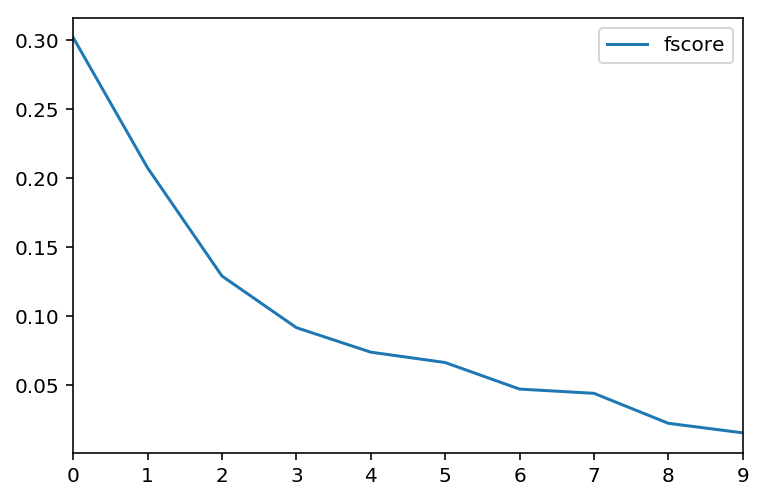

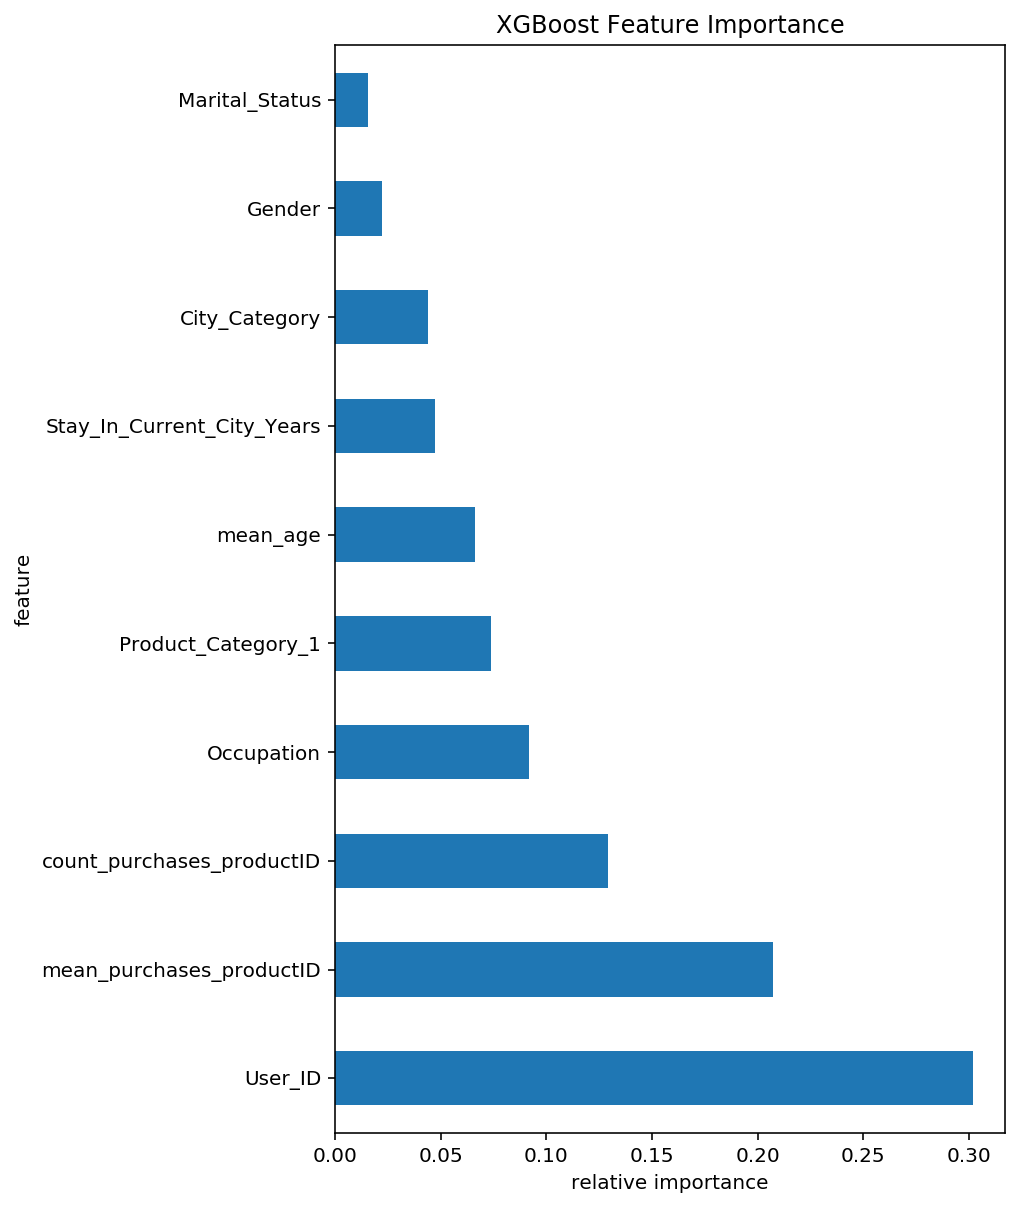

In [12]:
train1 = dtrain[cols1]
labels = train1.Purchase
features = train1.iloc[:, 0:-1]
xgb_feature_importance(features, labels, 1000, verbose=True)

#### Set 2

In [23]:
cols2 = [
    'User_ID',
    'Gender',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'mean_age',
    'total_purchases_productID',
    'count_purchases_productID',
    'Purchase'
]

In [24]:
dtrain[cols2].to_csv('data/feature_set_2.csv', index=False)

[0]	train-rmse:10410.9
[1]	train-rmse:10314.1
[2]	train-rmse:10218.4
[3]	train-rmse:10123.7
[4]	train-rmse:10030
[5]	train-rmse:9937.41
[6]	train-rmse:9845.63
[7]	train-rmse:9754.83
[8]	train-rmse:9665.14
[9]	train-rmse:9576.29
[10]	train-rmse:9488.39
[11]	train-rmse:9401.44
[12]	train-rmse:9315.44
[13]	train-rmse:9230.49
[14]	train-rmse:9146.37
[15]	train-rmse:9063.16
[16]	train-rmse:8980.83
[17]	train-rmse:8899.41
[18]	train-rmse:8819.01
[19]	train-rmse:8739.36
[20]	train-rmse:8660.59
[21]	train-rmse:8582.68
[22]	train-rmse:8505.62
[23]	train-rmse:8429.42
[24]	train-rmse:8354.17
[25]	train-rmse:8279.62
[26]	train-rmse:8205.89
[27]	train-rmse:8133
[28]	train-rmse:8060.9
[29]	train-rmse:7989.6
[30]	train-rmse:7919.09
[31]	train-rmse:7849.36
[32]	train-rmse:7780.49
[33]	train-rmse:7712.3
[34]	train-rmse:7644.91
[35]	train-rmse:7578.22
[36]	train-rmse:7512.31
[37]	train-rmse:7447.14
[38]	train-rmse:7382.72
[39]	train-rmse:7319.04
[40]	train-rmse:7256.05
[41]	train-rmse:7193.8
[42]	train-

[335]	train-rmse:2641.78
[336]	train-rmse:2641.06
[337]	train-rmse:2640.35
[338]	train-rmse:2639.66
[339]	train-rmse:2638.96
[340]	train-rmse:2638.29
[341]	train-rmse:2637.62
[342]	train-rmse:2636.97
[343]	train-rmse:2636.33
[344]	train-rmse:2635.71
[345]	train-rmse:2635.12
[346]	train-rmse:2634.53
[347]	train-rmse:2633.91
[348]	train-rmse:2633.31
[349]	train-rmse:2632.67
[350]	train-rmse:2632.11
[351]	train-rmse:2631.57
[352]	train-rmse:2631.02
[353]	train-rmse:2630.5
[354]	train-rmse:2629.97
[355]	train-rmse:2629.39
[356]	train-rmse:2628.88
[357]	train-rmse:2628.36
[358]	train-rmse:2627.84
[359]	train-rmse:2627.36
[360]	train-rmse:2626.81
[361]	train-rmse:2626.31
[362]	train-rmse:2625.82
[363]	train-rmse:2625.36
[364]	train-rmse:2624.83
[365]	train-rmse:2624.38
[366]	train-rmse:2623.91
[367]	train-rmse:2623.43
[368]	train-rmse:2622.9
[369]	train-rmse:2622.43
[370]	train-rmse:2622
[371]	train-rmse:2621.52
[372]	train-rmse:2621.09
[373]	train-rmse:2620.61
[374]	train-rmse:2620.16
[375]

[664]	train-rmse:2544.84
[665]	train-rmse:2544.73
[666]	train-rmse:2544.39
[667]	train-rmse:2544.17
[668]	train-rmse:2544.07
[669]	train-rmse:2543.96
[670]	train-rmse:2543.91
[671]	train-rmse:2543.81
[672]	train-rmse:2543.48
[673]	train-rmse:2543.38
[674]	train-rmse:2543.28
[675]	train-rmse:2543.24
[676]	train-rmse:2543.13
[677]	train-rmse:2542.81
[678]	train-rmse:2542.56
[679]	train-rmse:2542.44
[680]	train-rmse:2542.34
[681]	train-rmse:2542.03
[682]	train-rmse:2541.77
[683]	train-rmse:2541.6
[684]	train-rmse:2541.55
[685]	train-rmse:2541.45
[686]	train-rmse:2541.23
[687]	train-rmse:2540.92
[688]	train-rmse:2540.62
[689]	train-rmse:2540.38
[690]	train-rmse:2540.36
[691]	train-rmse:2540.15
[692]	train-rmse:2540.11
[693]	train-rmse:2539.83
[694]	train-rmse:2539.54
[695]	train-rmse:2539.52
[696]	train-rmse:2539.24
[697]	train-rmse:2539.02
[698]	train-rmse:2538.85
[699]	train-rmse:2538.83
[700]	train-rmse:2538.79
[701]	train-rmse:2538.5
[702]	train-rmse:2538.47
[703]	train-rmse:2538.36
[7

[993]	train-rmse:2504.38
[994]	train-rmse:2504.22
[995]	train-rmse:2504.13
[996]	train-rmse:2504.11
[997]	train-rmse:2504.05
[998]	train-rmse:2503.96
[999]	train-rmse:2503.74


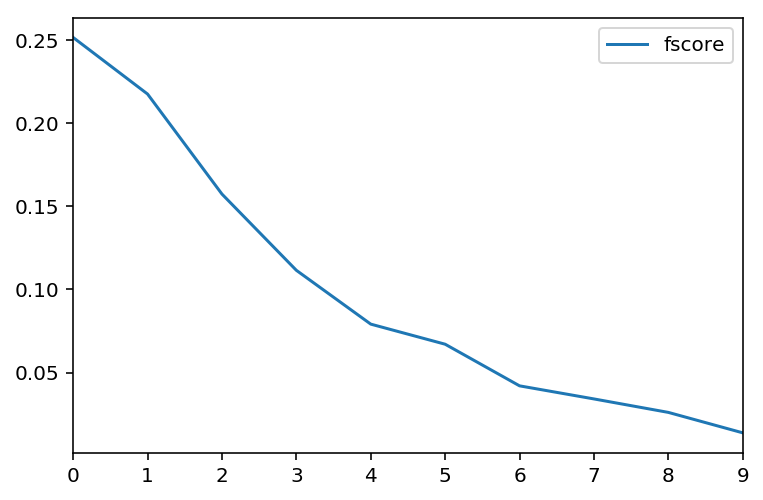

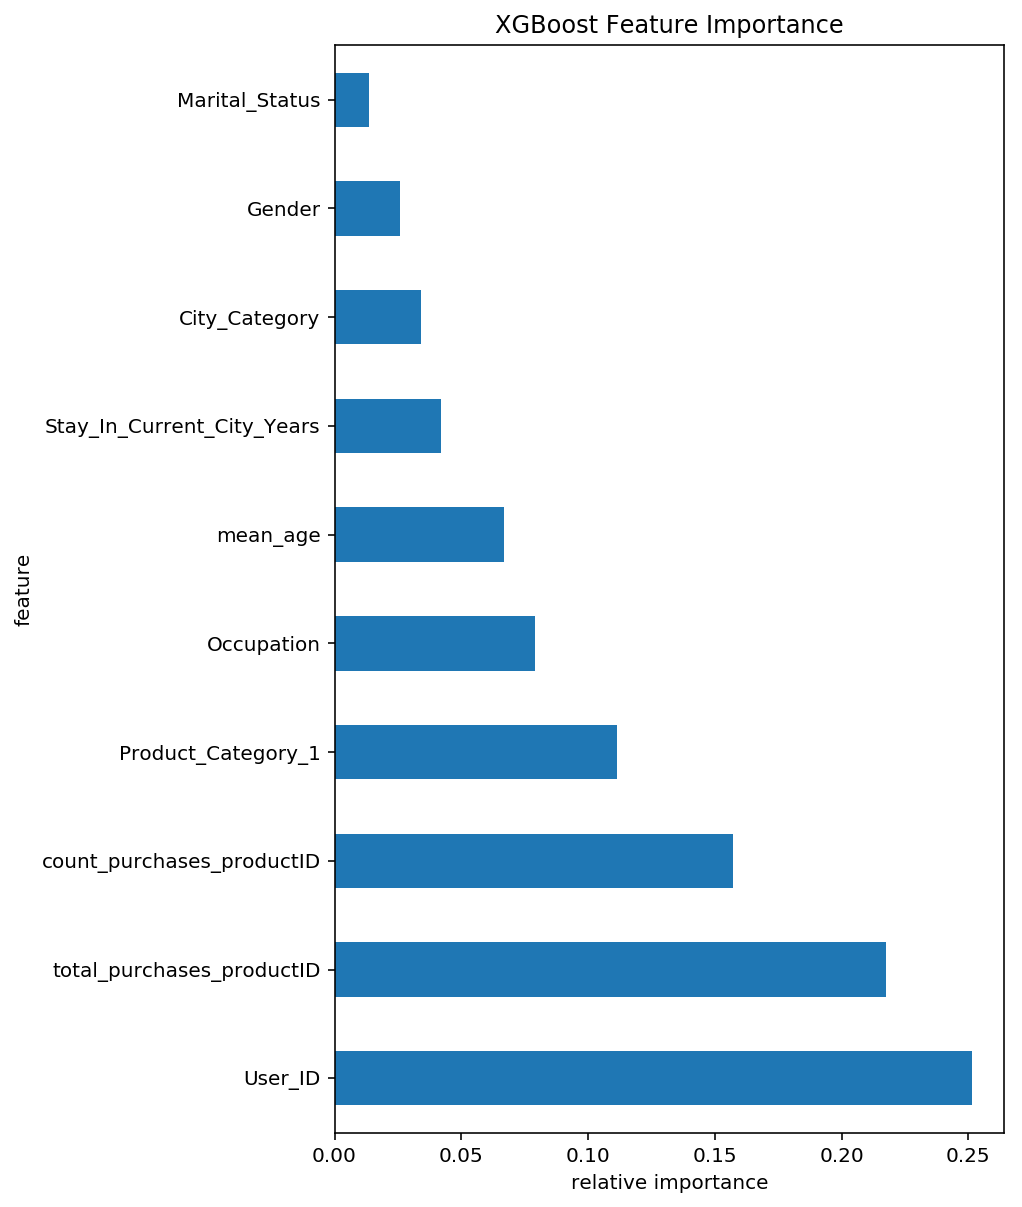

In [17]:
train2 = dtrain[cols2]
labels = train2.Purchase
features = train2.iloc[:, 0:-1]
xgb_feature_importance(features, labels, 1000, verbose=True)

It seems that the first set of features is better as compared to the second set of features

## Yet another feature

Let's create anothet feature related to the ```User_ID```. Because **User_ID** seems to be the most important feature.

In [20]:
def ratio_of_purchase_to_mean(row):
    print(row.Purchase / row.total_purchases_productID)

In [28]:
# dtrain.apply(ratio_of_purchase_to_mean, axis=1)
k = dtrain.groupby('User_ID')['Purchase'].sum()

In [33]:
dtrain['User_purchase_ratio'] = dtrain.apply(lambda row: row['Purchase'] / k[row['User_ID']], axis=1)
dtest['User_purchase_ratio'] = dtrain['User_purchase_ratio']

In [39]:
dtest.loc[dtest.mean_purchases_productID == 0, 'User_purchase_ratio'] = 0

In [40]:
dtest[dtest.mean_purchases_productID == 0]

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age,Purchase,total_purchases_productID,mean_purchases_productID,count_purchases_productID,User_purchase_ratio
30,50,1605,1,0,1,1,0,5,16.0,-999.0,30.5,-1,0.0,0.0,0,0.0
3664,5702,3272,0,20,0,0,0,5,8.0,18.0,21.5,-1,0.0,0.0,0,0.0
7468,5378,931,1,0,2,2,0,2,-999.0,-999.0,67.5,-1,0.0,0.0,0,0.0
8786,1451,2191,1,17,0,2,0,11,-999.0,-999.0,30.5,-1,0.0,0.0,0,0.0
13466,2800,2979,0,20,0,2,0,8,15.0,-999.0,53.0,-1,0.0,0.0,0,0.0
20643,1860,917,1,13,2,1,0,8,-999.0,-999.0,53.0,-1,0.0,0.0,0,0.0
28712,2202,123,0,7,2,1,0,8,-999.0,-999.0,48.0,-1,0.0,0.0,0,0.0
30711,5198,3008,0,13,2,4,0,5,6.0,-999.0,67.5,-1,0.0,0.0,0,0.0
30712,5198,3061,0,13,2,4,0,8,-999.0,-999.0,67.5,-1,0.0,0.0,0,0.0
31251,187,3672,1,4,2,1,0,8,-999.0,-999.0,21.5,-1,0.0,0.0,0,0.0


## Final feature selction

In [23]:
cols3 = [
    'User_ID',
    'User_purchase_ratio',
    'Gender',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'mean_age',
    'mean_purchases_productID',
    'count_purchases_productID',
    'Purchase'
]

In [24]:
dtrain[cols3].to_csv('data/feature_set_3.csv', index=False)

[0]	train-rmse:10408.7
[1]	train-rmse:10309.8
[2]	train-rmse:10211.9
[3]	train-rmse:10115
[4]	train-rmse:10019.1
[5]	train-rmse:9924.26
[6]	train-rmse:9830.39
[7]	train-rmse:9737.5
[8]	train-rmse:9645.6
[9]	train-rmse:9554.66
[10]	train-rmse:9464.68
[11]	train-rmse:9375.66
[12]	train-rmse:9287.56
[13]	train-rmse:9200.4
[14]	train-rmse:9114.16
[15]	train-rmse:9028.85
[16]	train-rmse:8944.42
[17]	train-rmse:8860.9
[18]	train-rmse:8778.28
[19]	train-rmse:8696.54
[20]	train-rmse:8615.64
[21]	train-rmse:8535.62
[22]	train-rmse:8456.45
[23]	train-rmse:8378.12
[24]	train-rmse:8300.63
[25]	train-rmse:8223.98
[26]	train-rmse:8148.14
[27]	train-rmse:8073.11
[28]	train-rmse:7998.89
[29]	train-rmse:7925.48
[30]	train-rmse:7852.83
[31]	train-rmse:7780.99
[32]	train-rmse:7709.91
[33]	train-rmse:7639.61
[34]	train-rmse:7570.07
[35]	train-rmse:7501.28
[36]	train-rmse:7433.21
[37]	train-rmse:7365.92
[38]	train-rmse:7299.33
[39]	train-rmse:7233.46
[40]	train-rmse:7168.34
[41]	train-rmse:7103.91
[42]	tra

[334]	train-rmse:2208.73
[335]	train-rmse:2207.85
[336]	train-rmse:2206.97
[337]	train-rmse:2206.12
[338]	train-rmse:2205.31
[339]	train-rmse:2204.49
[340]	train-rmse:2203.48
[341]	train-rmse:2202.46
[342]	train-rmse:2201.64
[343]	train-rmse:2200.85
[344]	train-rmse:2200.03
[345]	train-rmse:2199.24
[346]	train-rmse:2198.32
[347]	train-rmse:2197.57
[348]	train-rmse:2196.72
[349]	train-rmse:2196
[350]	train-rmse:2195.3
[351]	train-rmse:2194.58
[352]	train-rmse:2193.79
[353]	train-rmse:2193.07
[354]	train-rmse:2192.3
[355]	train-rmse:2191.6
[356]	train-rmse:2190.82
[357]	train-rmse:2189.55
[358]	train-rmse:2188.76
[359]	train-rmse:2188.07
[360]	train-rmse:2187.31
[361]	train-rmse:2186.61
[362]	train-rmse:2185.99
[363]	train-rmse:2185.37
[364]	train-rmse:2184.63
[365]	train-rmse:2183.8
[366]	train-rmse:2183.01
[367]	train-rmse:2182.39
[368]	train-rmse:2181.7
[369]	train-rmse:2181.08
[370]	train-rmse:2180.3
[371]	train-rmse:2179.64
[372]	train-rmse:2178.75
[373]	train-rmse:2178.08
[374]	tra

[664]	train-rmse:2044.26
[665]	train-rmse:2043.98
[666]	train-rmse:2043.67
[667]	train-rmse:2043.51
[668]	train-rmse:2043.28
[669]	train-rmse:2043.13
[670]	train-rmse:2042.95
[671]	train-rmse:2042.66
[672]	train-rmse:2042.3
[673]	train-rmse:2041.84
[674]	train-rmse:2041.51
[675]	train-rmse:2041.33
[676]	train-rmse:2041.07
[677]	train-rmse:2040.89
[678]	train-rmse:2040.75
[679]	train-rmse:2040.37
[680]	train-rmse:2040.04
[681]	train-rmse:2039.76
[682]	train-rmse:2039.28
[683]	train-rmse:2038.84
[684]	train-rmse:2038.65
[685]	train-rmse:2038.51
[686]	train-rmse:2038.22
[687]	train-rmse:2037.9
[688]	train-rmse:2037.37
[689]	train-rmse:2037.24
[690]	train-rmse:2036.95
[691]	train-rmse:2036.5
[692]	train-rmse:2036.12
[693]	train-rmse:2035.75
[694]	train-rmse:2035.61
[695]	train-rmse:2035.22
[696]	train-rmse:2034.82
[697]	train-rmse:2034.55
[698]	train-rmse:2034.18
[699]	train-rmse:2034.03
[700]	train-rmse:2033.64
[701]	train-rmse:2033.18
[702]	train-rmse:2032.79
[703]	train-rmse:2032.67
[70

[993]	train-rmse:1951.86
[994]	train-rmse:1951.53
[995]	train-rmse:1951.42
[996]	train-rmse:1951.33
[997]	train-rmse:1951.23
[998]	train-rmse:1950.98
[999]	train-rmse:1950.76


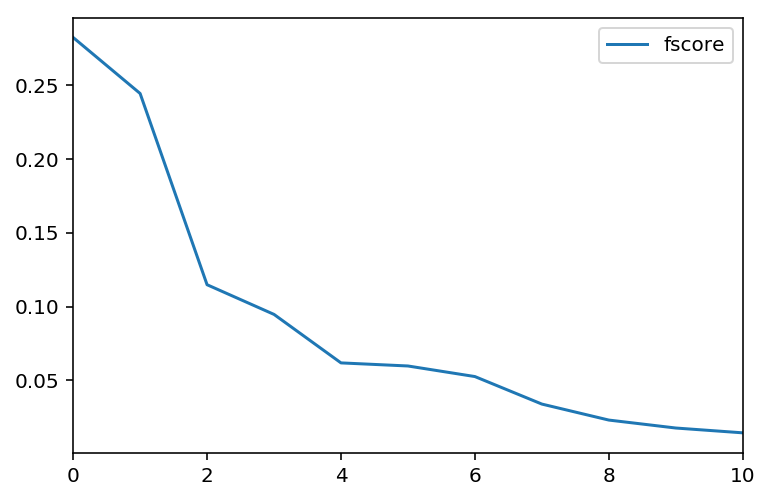

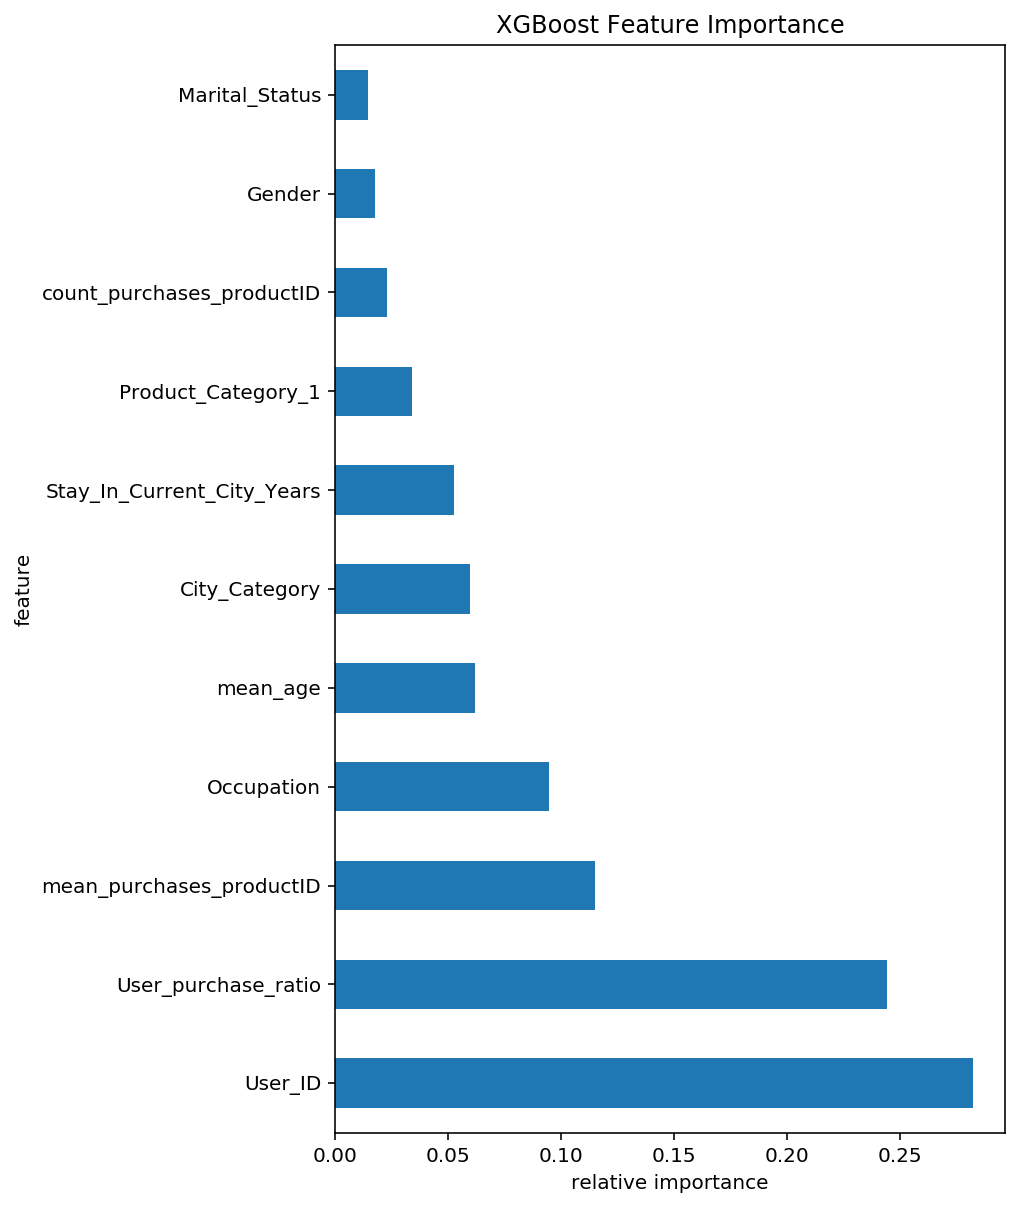

In [23]:
train3 = dtrain[cols3]
labels = train3.Purchase
features = train3.iloc[:, 0:-1]
xgb_feature_importance(features, labels, 1000, verbose=True)